In [291]:
%pylab inline

import spot
import PatternStimulus as ps
import pickle
import sequence
reload(sequence)
import random
from time_shifter import duration_shifter
from copy import deepcopy

Populating the interactive namespace from numpy and matplotlib


In [292]:
with open('10722.pickle','rb') as fn:
    sess, spots = pickle.load(fn)

In [293]:
spots['list'].values()

[[2, 2], [8, 4], [9, 1], [6, 3], [2, 0], [2, 4], ['random']]

In [294]:
ptn='A10_B50_C90_D130_E170_F210-16'

nowSess=sess[-1]
xy,timing,intensities,grouptimes,rand_args=ps.get_pattern_params(spots['list'],ptn,nowSess) 

fixed_spotsize = nowSess['pre']['gridsize']
spotsizes=[fixed_spotsize for x in range(len(xy))] #TODO: variable spot size per spot
isProbe = 1
rig='Polygon'
#rig ='ALP2'
seq_obj=sequence.Sequence(spots=xy,
                          timing=timing,
                          isProbe=isProbe,
                          rig=rig,
                          spotsizes=spotsizes,
                          label=ptn,
                          mode='grid',
                          intensities=intensities,
                          grouptimes=grouptimes,
                          rand_args=rand_args)

#for polygon, using Sequence
if seq_obj.isRandomSequence:
    excluded_spots = spots['list'].values() #target spots
    if ['random'] in excluded_spots:
        excluded_spots.remove(['random'])
    seq_obj.excluded_spots=array(excluded_spots)


#if seq_obj.isRandomSequence:
#    seq_obj.rand_spotlist = spots['list']['R']




In [295]:
target=deepcopy(seq_obj)
tptn = {}
for s in target.spotlist:
    tptn[tuple(s.xy)]=s.timing

onsets = [t[0] for t in tptn.values()]
onsets.sort()

In [296]:
spot2pos = {}
for s,t in tptn.items():
    pos = onsets.index(t[0])
    spot2pos[s] = pos 

In [297]:
replaceVec_all = []
shiftVec_all = []
nspots=len(tptn)
for i in range(1000):
    seq_obj.randomize()
    replaceVec = [0]*nspots
    shiftVec = [0]*nspots

    ptn = {}
    for s in seq_obj.spotlist:
        ptn[tuple(s.xy)]=s.timing

    for tgt_s,tgt_t in tptn.items():
        pos = spot2pos[tgt_s]
        if tgt_s not in ptn:
            replaceVec[pos] = 1
        else:
            t = ptn[tgt_s]
            shiftVec[pos] = t[0]-tgt_t[0]
    if np.sum(np.array(shiftVec)>80)>0:
        print 'EH'
        break

    replaceVec_all.append(replaceVec)
    shiftVec_all.append(shiftVec)

In [226]:
for tgt_s,tgt_t in tptn.items():
    if tgt_s in ptn:
        print tgt_s,tgt_t,ptn[tgt_s]

(9, 1) [50, 130] [170, 250]
(2, 0) [130, 210] [130, 210]
(2, 2) [10, 90] [10, 90]
(2, 4) [210, 290] [210, 290]
(8, 4) [90, 170] [90, 170]


(-90, 90)

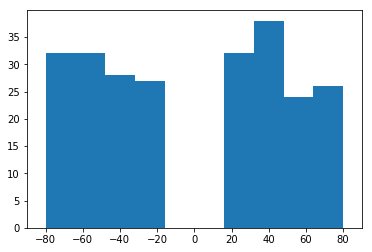

In [305]:
replaceVec_all = np.array(replaceVec_all)
shiftVec_all = np.array(shiftVec_all)
vec=shiftVec_all[:,5]
#vec=replaceVec_all[]
plt.hist(vec[vec!=0])
plt.xlim([-90,90])
#plt.ylim([0,600])

In [ ]:
np.unique(shiftVec_all[:,0])

(array([ 590.,    0.,    0.,    0.,    0.,  299.,    0.,    0.,    0.,  111.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

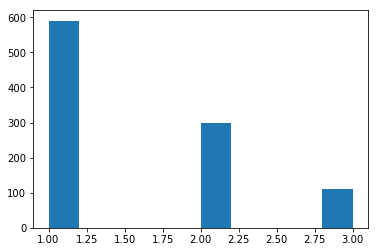

In [307]:
plt.hist(np.sum(np.array(replaceVec_all),axis=1))